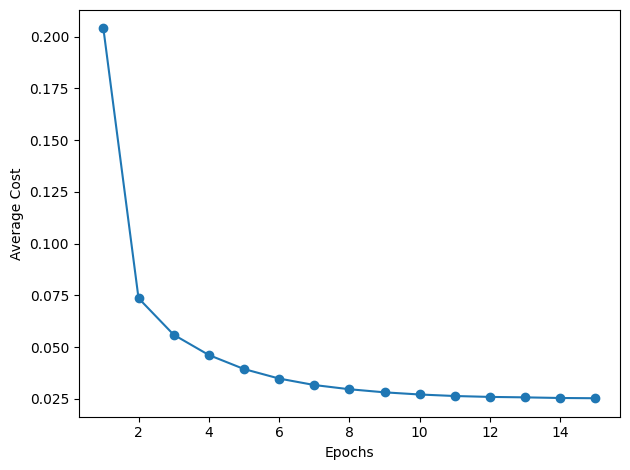

In [16]:
#Learn from data one by one at each visit
#Unlike perceptron, learn even if prediction is correct (but not exact)

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

class AdalineSGD(object):
  def __init__(self, learningRate, visitCounts, randomSeed, shuffle=True):
    self.learningRate = learningRate
    self.visitCounts = visitCounts
    self.randomSeed = randomSeed
    self.shuffle = shuffle
    self.w_initialized = False

  def train(self, X, y):
    self.cost_ = []
    self.initialize_weights(X.shape[1]) #shape[1] because X.shape is an array [100, 2] and shape[1] = 2 that grabs the size of each row i.e. number of features

    for i in range(self.visitCounts):
      if self.shuffle:
        X, y = self.shuffle_(X, y)

      cost = []

      for xi, target in zip(X, y):
        cost.append(self.update_weights(xi, target))

      avg_cost = sum(cost)/len(y)
      self.cost_.append(avg_cost)
    return self

  def train_on_the_go(self, X, y):
    if not self.w_initialized:
      self.initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self.update_weights(xi, target)
    else:
      self.update_weights(X, y)

  def initialize_weights(self, rowSize):
    self.rgen = np.random.RandomState(self.randomSeed)
    self.weights_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + rowSize)
    self.w_initialized = True

  def update_weights(self, xi, target):
    output = self.activation(self.net_input(xi))
    error = target - output
    self.weights_[1:] += self.learningRate * error * xi
    self.weights_[0] += self.learningRate * error
    c = 0.5 * error ** 2
    return c


  def net_input(self, X):
    return np.dot(X, self.weights_[1:]) + self.weights_[0]

  def activation(self, X):
    return X

  def shuffle_(self, X, y):
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def predict(self, X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)



s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris','iris.data')

df = pd.read_csv(s, header=None, encoding='utf-8')

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

#Standardizing:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X_std[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X_std[:, 1].std()

ada_sgd = AdalineSGD(0.01, 15, 1)
ada_sgd.train(X_std, y)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()